
# Vehicle Detection Project

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

[//]: # (Image References)
[image1]: ./examples/car_not_car.png
[image2]: ./examples/HOG_example.jpg
[image3]: ./examples/sliding_windows.jpg
[image4]: ./examples/sliding_window.jpg
[image5]: ./examples/bboxes_and_heat.png
[image6]: ./examples/labels_map.png
[image7]: ./examples/output_bboxes.png
[video1]: ./project_video.mp4

## [Rubric](https://review.udacity.com/#!/rubrics/513/view) Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---


### Extracting HOG features from the training images.

The code for this step is contained in lines 6 through 25 of the file called `lesson_functions.py`.  

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:

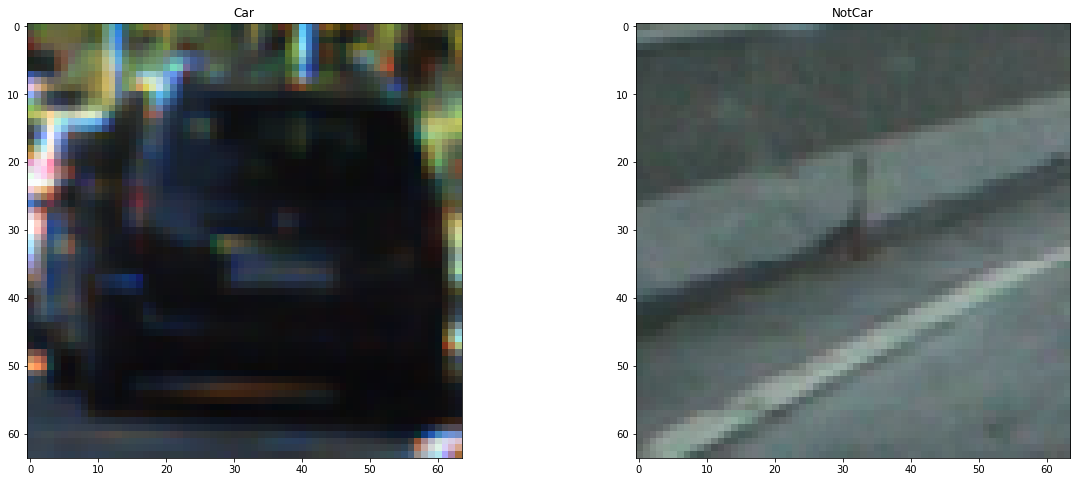


I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)`:

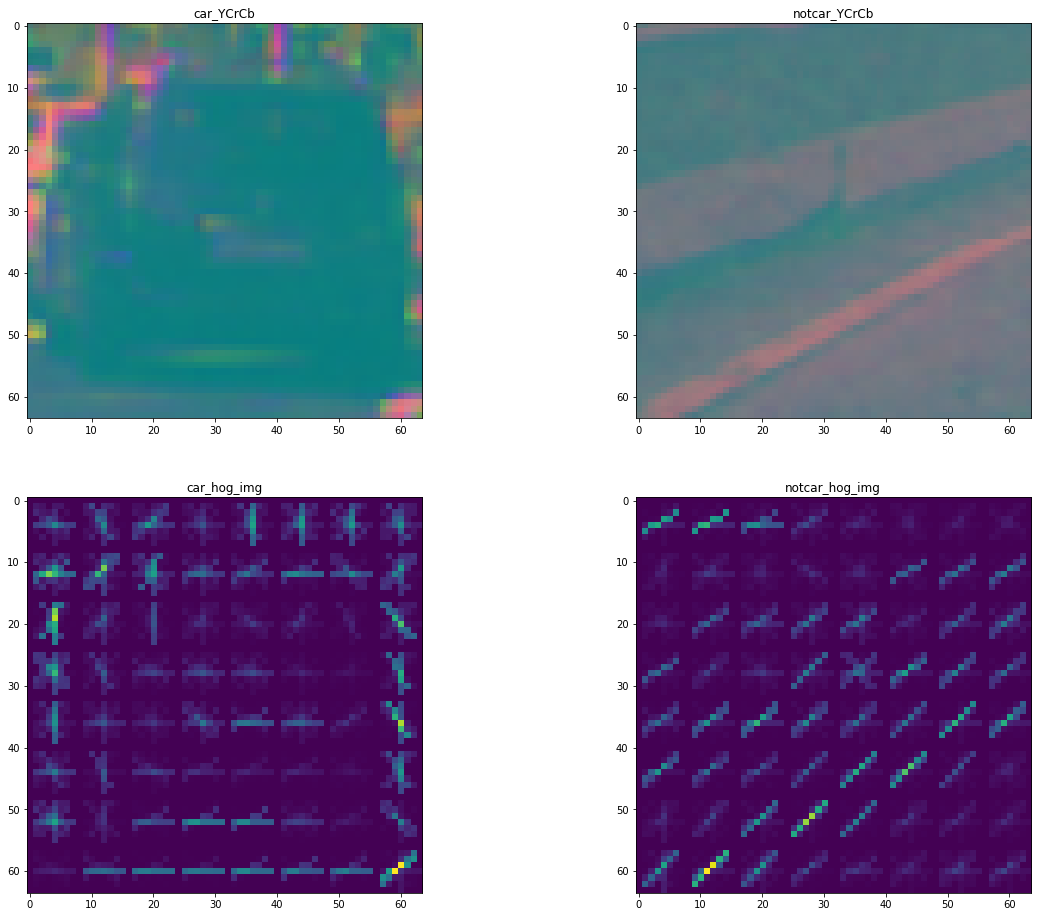

### Extracting Spatial Binning of Color features
The code for this step is contained in lines 28 through 32 of the file called `lesson_functions.py`. 

To make the algorithm more robust in identifying the cars, a new type of features is used additionally to the HOG features. Template matching is not a particularly robust method for finding vehicles unless you know exactly what your target object looks like. However, raw pixel values are still quite useful to include in your feature vector in searching for cars.

While it could be cumbersome to include three color channels of a full resolution image, we can perform spatial binning on an image and still retain enough information to help in finding vehicles.

As you can see in the example bellow, even going all the way down to 32 x 32 pixel resolution, the car itself is still clearly identifiable by eye, and this means that the relevant features are still preserved at this resolution.

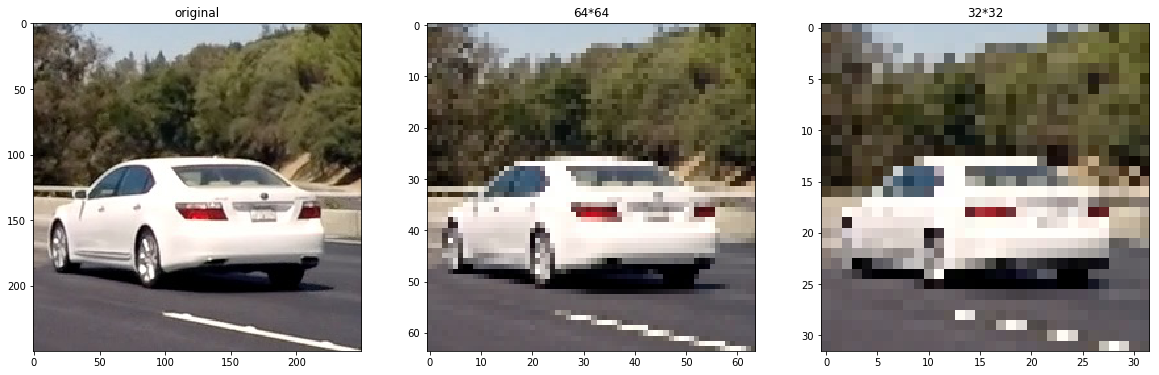
### Extraction of Histograms of Color features
The code for this step is contained in lines 36 through 44 of the file called `lesson_functions.py`. 

Template matching is useful for detecting things that do not vary much in their appearance. But for most real world objects that do appear in different forms , orientations and sizes this technique does not work quite well.Histogram of color features are more robust to changes in appearance. So the histograms of Color features is added to the feature vector too.

Here is a example of histograms of color features.

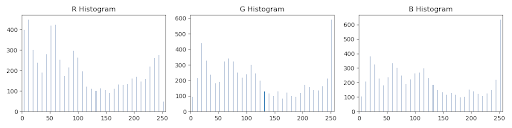

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and combined with the test accuracy of the classifer, I found that it worked the best using the HSV color space in combination with features extracted with HOG with orientations=9, pixels_per_cell=(8, 8) , cells_per_block=(2, 2) and spatial_size = (16, 16),hist_bins = 16.

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).
The source code can be found in search_classify.ipynb

I trained a linear SVM using 2 classes of images vehicle and non-vehicle images. The images are first loaded, then normalized features are extracted, and shuffled and splited into 2 datasets train (80%) and test (20%). The features were scaled to zero mean and unit variance before training the classifier using the StandardScaler(). Then I used GridsearchCV technique to tune the classifer with a parameter group of '{'C':[1,10,100], 'gamma':[2 ** x for x in range(-15, -10)]}'. Finaly I get the the optimal parameter combination of the classifier.

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

The code for this step is contained in lines 173 through 238 of the file called `lesson_functions.py`.

The search is only needed in the lower part of the picture,because on the upper half of the pictures are sky and trees,no car appears.
The window size is 64 pixels, with 8 cells and 8 pix per cell. At each slide the windows move by 2 cells either to the right or to the bottom. To make the search faster by avoiding the features extraction over and over for each window, the HOG feature extraction is done only once, and then the sliding window uses only that part of the image. 
Then I tried different scales and overlap precentages. With different scales, the cars on the pictures with different size can be detected.However ,when the scale is small, there seems to have more false positive. So I finally choosed to search with scale=1.5.



#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on two scales using HSV 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result.  Here are some example images:

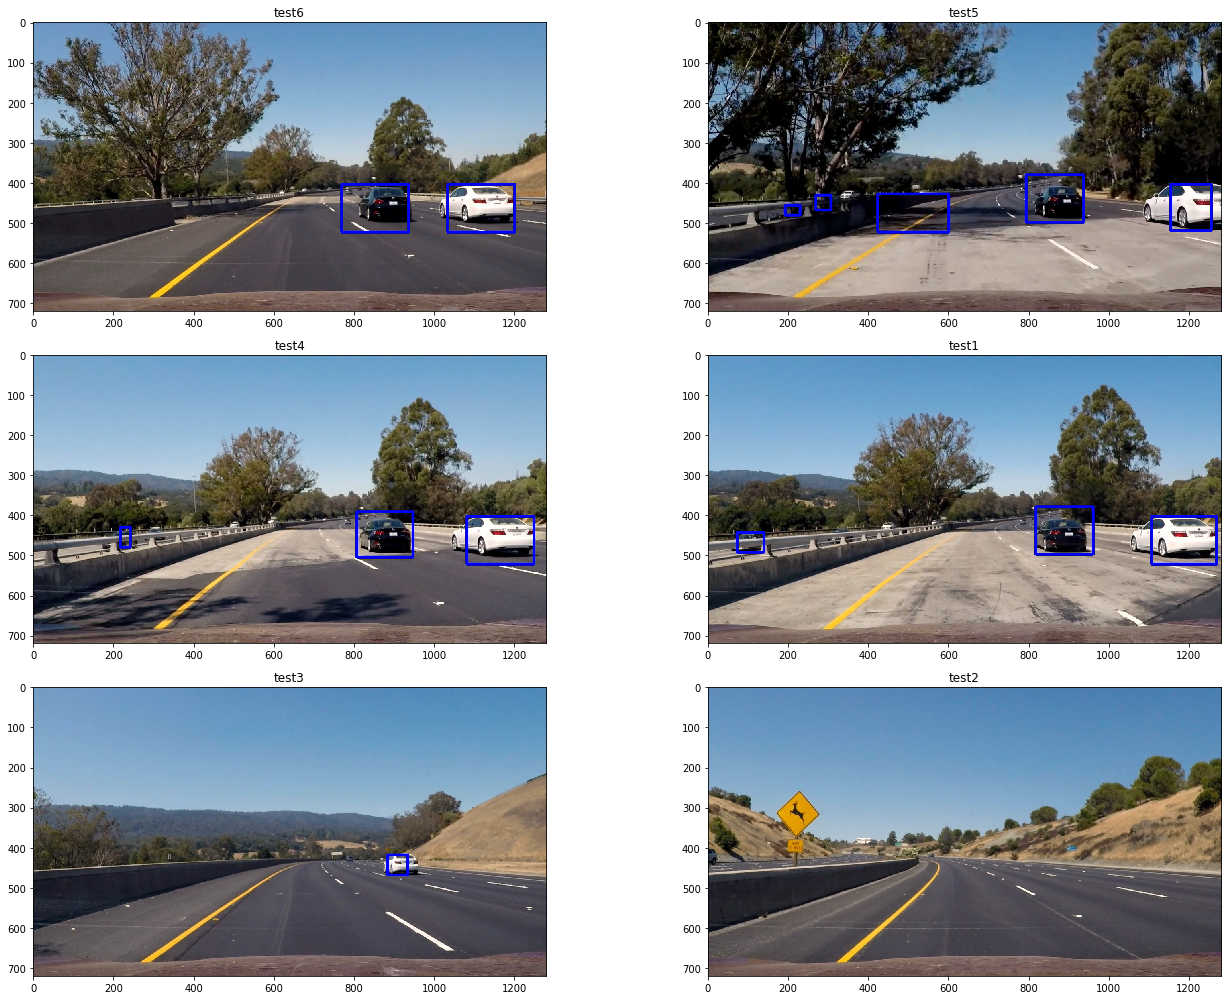

---

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./project_video_output.mp4)



#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

The source code can be found in process_img.ipynb.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a frame of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes :

### Here is a frame and its corresponding heatmap:
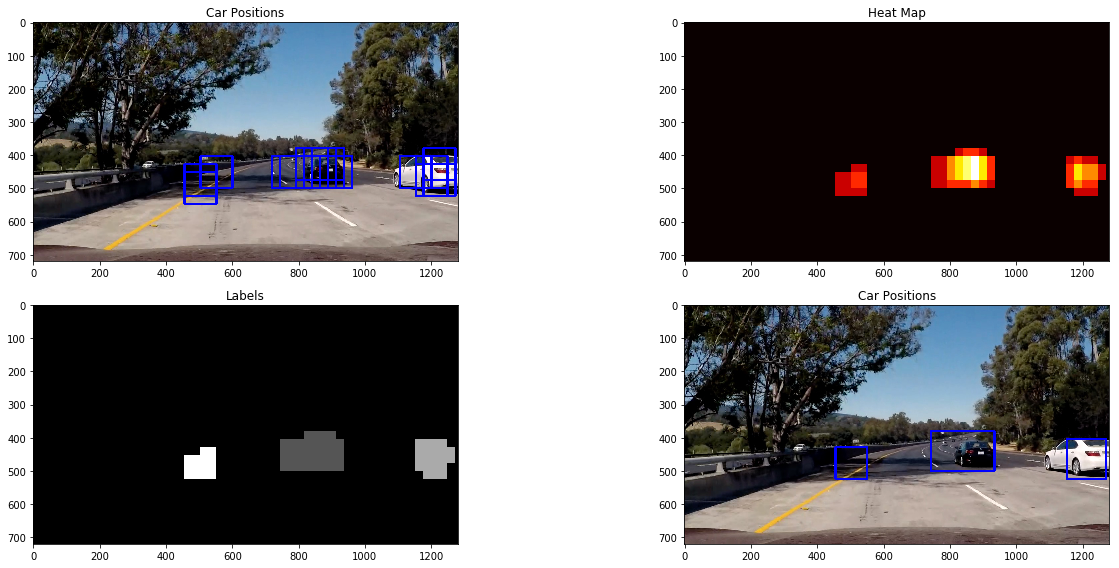

---

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?


The current implementation seems to be basicaly working well for the test images and videos.but there are serval situations the implementation does not work that well.At first, for the frames with many tree shadows on the road, it difficult to avoid false positive.Secondly, the cars on the far away are diffcult to detect.

I tried to combine multi-size silding windows together, the result is I do get more positive car position,but on the other hand I also get more false postive.I haven't figure out how to elimilate the false positive in this situation,so I gived up this approach.

Another issue with the current implementation is that in the video processing pipeline subsequent frames are not considered. Keeping a heat map between consecutive frames may discard false positives better.

At last,I think a classifier using deep learning and Convolutional Neural Networks will work better for this project.
 


